In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

# Rio de Janeiro

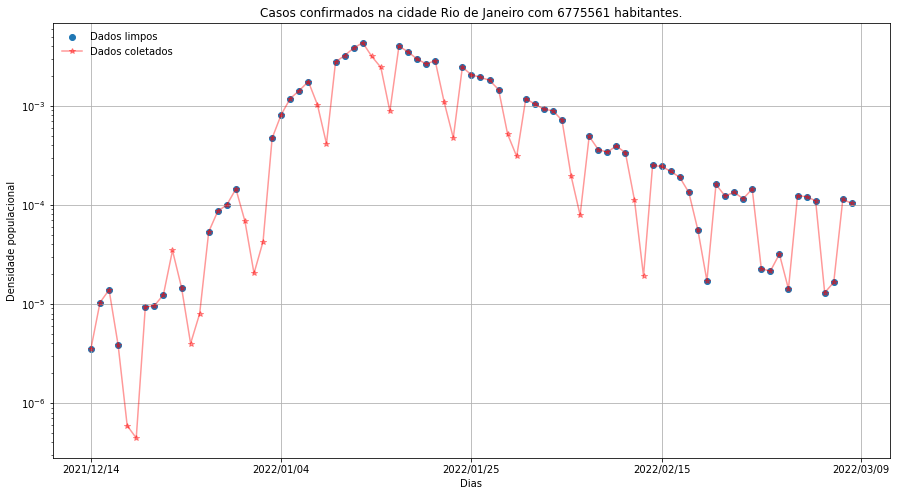

In [38]:

##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 670
leste = 755

##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')
ax.plot(dados1_x_rio, dados1_y_rio,'-*',color='r', alpha=0.4, label='Dados coletados')
ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias')
ax.legend(frameon=False, loc='upper left')
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

plt.title(f'Casos confirmados na cidade {nome_cidade} com {população} habitantes.')
plt.yscale('log')

plt.savefig('/home/isplay/Área de Trabalho/RJ_dados.png')

Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

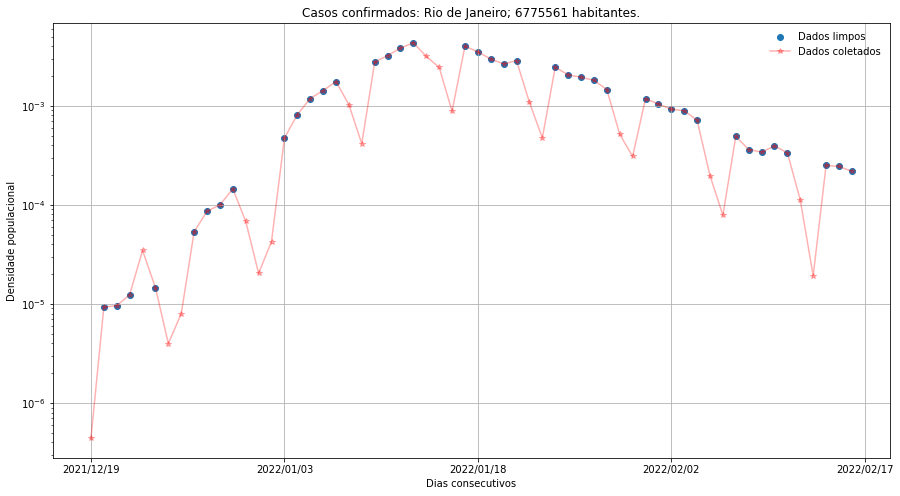

In [3]:
# Log-linear


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos

oeste = 675
leste = 735

##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')
ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

plt.yscale('log')

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')


Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

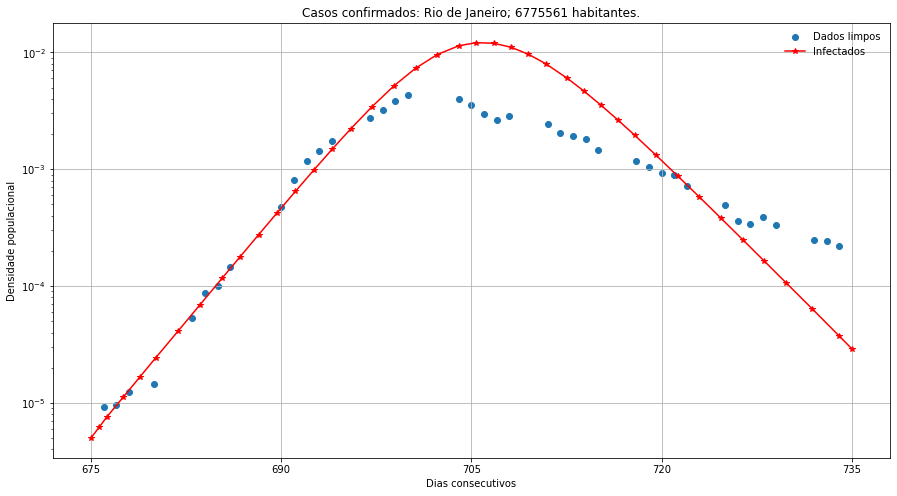

In [4]:
# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i - delta * s * i
    dedt = delta * s * i - alpha * e * i
    didt = R0 * s * i + alpha * e * i - i
    drdt = i
    return dsdt, dedt, didt, drdt


R0 = 1.3
alpha = 0
delta = R0 + 0.5
i0 = 5e-6

t0, t =  675, 735
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res_LSODA = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "LSODA")


# Log-linear


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos

oeste = 675
leste = 735

##############################


meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')
#ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')

# Modelo.
ax.plot(res_LSODA.t, res_LSODA.y[2], '*-r', label='Infectados')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
#label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
#         dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste]) # labels=label

plt.yscale('log')

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

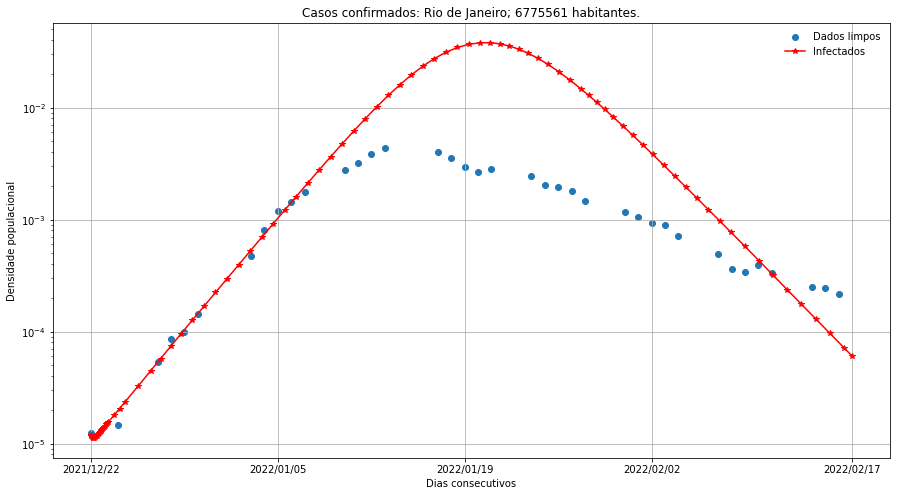

In [5]:



# Log-linear


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos

oeste = 678
leste = 735

##############################
# Modelo:

# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i
    dedt = R0 * s * i - alpha * e 
    didt = alpha * e - i
    drdt = i
    return dsdt, dedt, didt, drdt


R0 = 1.39
alpha = 7
i0 = 1.2e-5

t0, t =  oeste, leste
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res_LSODA = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "LSODA")

##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')
#ax.plot(dados1_x_rio, dados1_y_rio,'*-r', alpha=0.3, label='Dados coletados')

# Modelo.
ax.plot(res_LSODA.t, res_LSODA.y[2], '*-r', label='Infectados')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
         dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label) # labels=label

plt.yscale('log')

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

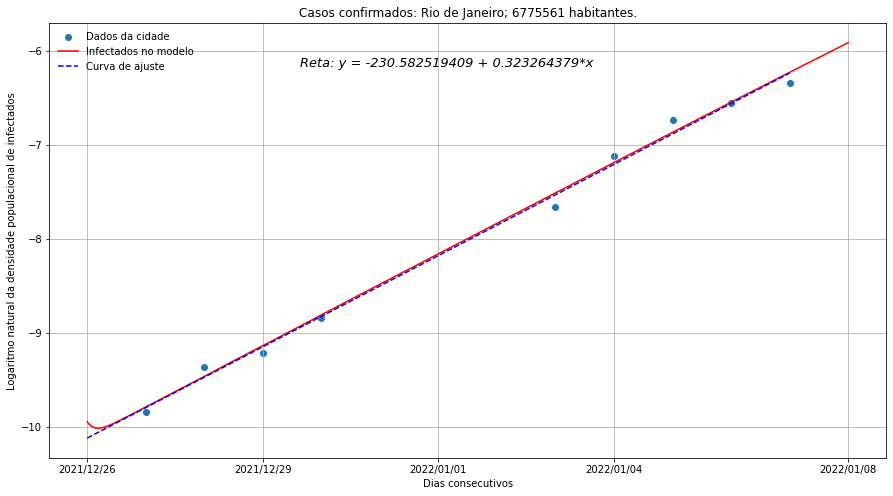

In [6]:
# Log-linear


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos

oeste = 682
leste = 695

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

##############################
# Modelo.

# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i
    dedt = R0 * s * i - alpha * e 
    didt = alpha * e - i
    drdt = i
    return dsdt, dedt, didt, drdt


R0 = 1.386
alpha = 7
i0 = 4.8e-5

t0, t =  oeste, leste
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res_LSODA_sub = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "LSODA")

##############################

# Misc.

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

dados0_y_rio_log = np.log(dados0[nome_cidade][oeste:leste].to_numpy()/população)
inf_log = np.log(res_LSODA_sub.y[2])

idx = np.isfinite(dados0_x_rio) & np.isfinite(dados0_y_rio_log)
coef1 = np.polynomial.polynomial.Polynomial.fit(dados0_x_rio[idx], dados0_y_rio_log[idx], 1)
c_linear_sub_rio, c_angular_sub_rio = coef1.convert().coef

##############################
# Plot.

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio_log, alpha=1, label='Dados da cidade')

ax.plot(res_LSODA_sub.t, inf_log, '-r', label='Infectados no modelo')

ax.plot(dados0_x_rio, c_linear_sub_rio + c_angular_sub_rio*dados0_x_rio, '--b',label='Curva de ajuste')

ax.text(0.3, 0.9, f'Reta: y = {round(c_linear_sub_rio,9)} + {round(c_angular_sub_rio,9)}*x', fontsize=13,style='italic',transform=ax.transAxes)

ax.grid(True)
ax.set_ylabel('Logaritmo natural da densidade populacional de infectados')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
         dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)


#plt.yscale('log')

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

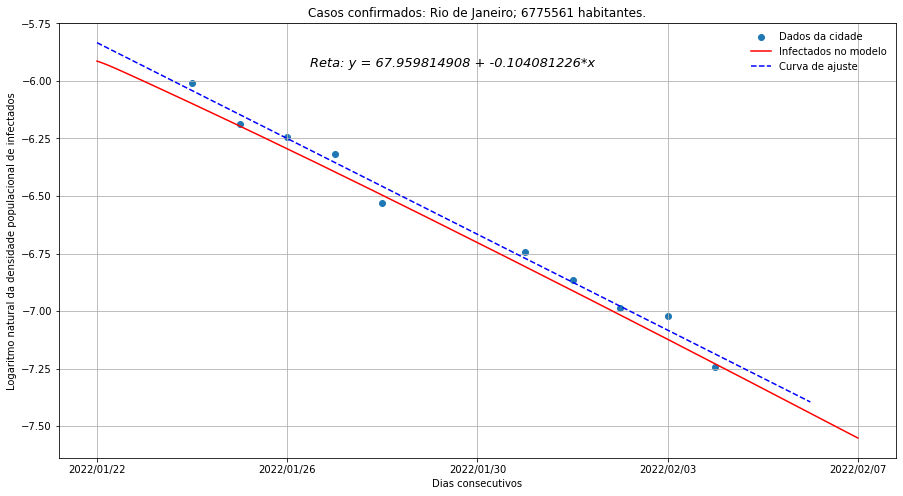

In [7]:
# Log-linear


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos

oeste = 709
leste = 725

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

##############################
# Modelo.

# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i
    dedt = R0 * s * i - alpha * e 
    didt = alpha * e - i
    drdt = i
    return dsdt, dedt, didt, drdt


R0 = 0.90
alpha = 5.0
i0 = res_LSODA_sub.y[2][-1]

t0, t =  oeste, leste
e0 = res_LSODA_sub.y[1][-1]
r0 = res_LSODA_sub.y[3][-1]
s0 = 1 - e0 - i0 - r0

res_LSODA_des = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "LSODA")

##############################

# Misc.

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

dados0_y_rio_log = np.log(dados0[nome_cidade][oeste:leste].to_numpy()/população)
inf_log = np.log(res_LSODA_des.y[2])

idx = np.isfinite(dados0_x_rio) & np.isfinite(dados0_y_rio_log)
coef1 = np.polynomial.polynomial.Polynomial.fit(dados0_x_rio[idx], dados0_y_rio_log[idx], 1)
c_linear_sub_rio, c_angular_sub_rio = coef1.convert().coef

##############################
# Plot.

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio_log, alpha=1, label='Dados da cidade')

ax.plot(res_LSODA_des.t, inf_log, '-r', label='Infectados no modelo')

ax.plot(dados0_x_rio, c_linear_sub_rio + c_angular_sub_rio*dados0_x_rio, '--b',label='Curva de ajuste')

ax.text(0.3, 0.9, f'Reta: y = {round(c_linear_sub_rio,9)} + {round(c_angular_sub_rio,9)}*x', fontsize=13,style='italic',transform=ax.transAxes)

ax.grid(True)
ax.set_ylabel('Logaritmo natural da densidade populacional de infectados')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
         dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)


#plt.yscale('log')

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

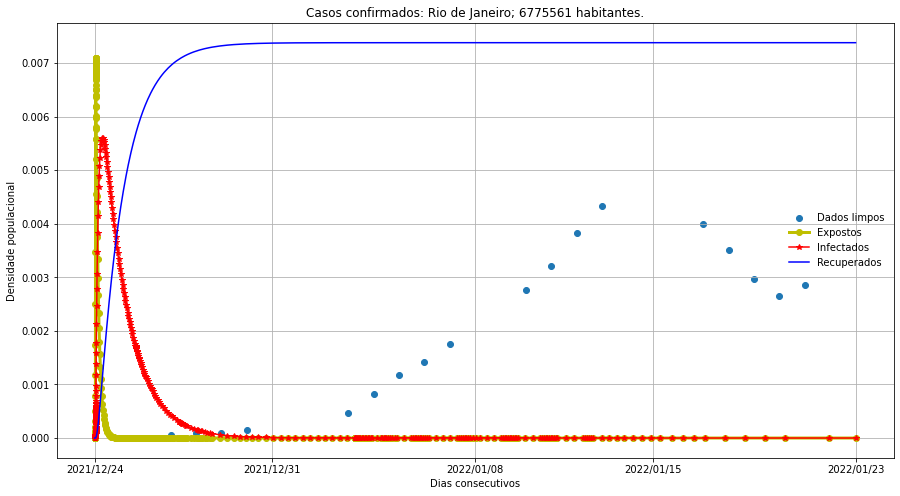

In [11]:
##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 680
leste = 710

##############################

# Modelo.

# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i
    dedt = R0 * s * i - alpha * e 
    didt = alpha * e - i
    drdt = i
    return dsdt, dedt, didt, drdt


R0 = 1.386
alpha = 9
i0 = 4.8e-10

t0, t =  oeste, leste
e0 = 0
r0 = 0
s0 = 50000 - e0 - i0 - r0

res_LSODA = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "LSODA")

sus = res_LSODA.y[0]/população
exp = res_LSODA.y[1]/população
inf = res_LSODA.y[2]/população
rec = res_LSODA.y[3]/população

##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

##############################
# Plot.

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

#ax.plot(res_LSODA.t, sus, '--g', label='Suscetível')
ax.plot(res_LSODA.t, exp, 'o-y',lw=3, label='Expostos')
ax.plot(res_LSODA.t, inf, '*-r', label='Infectados')
ax.plot(res_LSODA.t, rec, '-b', label='Recuperados')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')


Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

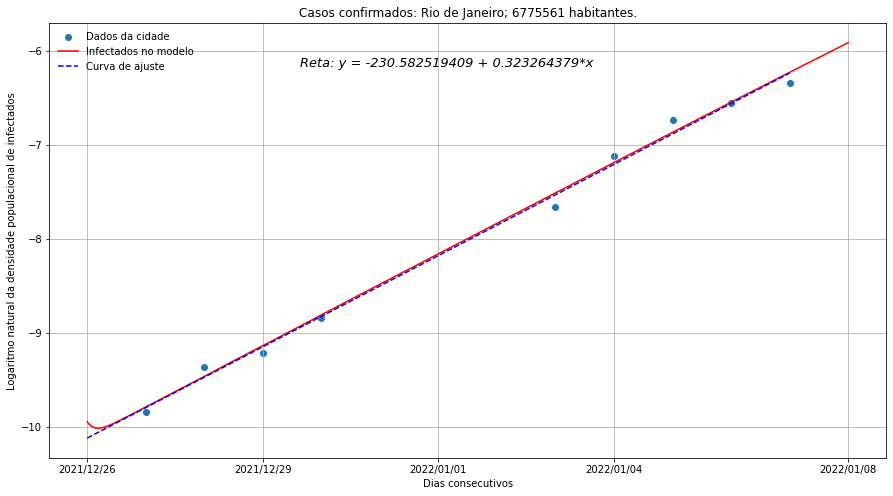

In [45]:
# Log-linear


##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos

oeste = 682
leste = 695

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

##############################
# Modelo.

# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def seir(t, y, alpha, R0, delta):
    s, e, i, r = y
    dsdt = - R0 * s * i
    dedt = R0 * s * i - alpha * e 
    didt = alpha * e - i
    drdt = i
    return dsdt, dedt, didt, drdt


R0 = 1.386
alpha = 7
i0 = 4.8e-5

t0, t =  oeste, leste
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res_LSODA_sub = solve_ivp(seir, (t0, t), args=(alpha, R0, delta), y0=[s0, e0, i0, r0], method = "LSODA")

##############################

# Misc.

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()

dados1_y_rio = dados1[nome_cidade][oeste:leste].to_numpy()/população
dados1_x_rio = dados1.index[oeste:leste].to_numpy()

dados0_y_rio_log = np.log(dados0[nome_cidade][oeste:leste].to_numpy()/população)
inf_log = np.log(res_LSODA_sub.y[2])

idx = np.isfinite(dados0_x_rio) & np.isfinite(dados0_y_rio_log)
coef1 = np.polynomial.polynomial.Polynomial.fit(dados0_x_rio[idx], dados0_y_rio_log[idx], 1)
c_linear_sub_rio, c_angular_sub_rio = coef1.convert().coef

##############################
# Plot.

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio_log, alpha=1, label='Dados da cidade')

ax.plot(res_LSODA_sub.t, inf_log, '-r', label='Infectados no modelo')

ax.plot(dados0_x_rio, c_linear_sub_rio + c_angular_sub_rio*dados0_x_rio, '--b',label='Curva de ajuste')

ax.text(0.3, 0.9, f'Reta: y = {round(c_linear_sub_rio,9)} + {round(c_angular_sub_rio,9)}*x', fontsize=13,style='italic',transform=ax.transAxes)

ax.grid(True)
ax.set_ylabel('Logaritmo natural da densidade populacional de infectados')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
         dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)


#plt.yscale('log')

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

Text(0.5, 1.0, 'Casos confirmados: Rio de Janeiro; 6775561 habitantes.')

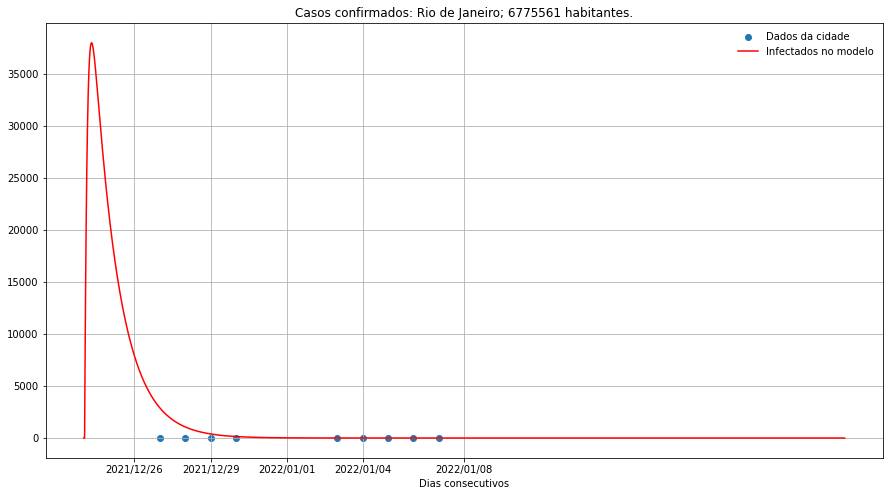

In [47]:

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados da cidade')

ax.plot(res_LSODA.t, res_LSODA.y[2], '-r', label='Infectados no modelo')

ax.grid(True)
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
         dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)


#plt.yscale('log')

plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

(0.0, 0.1)

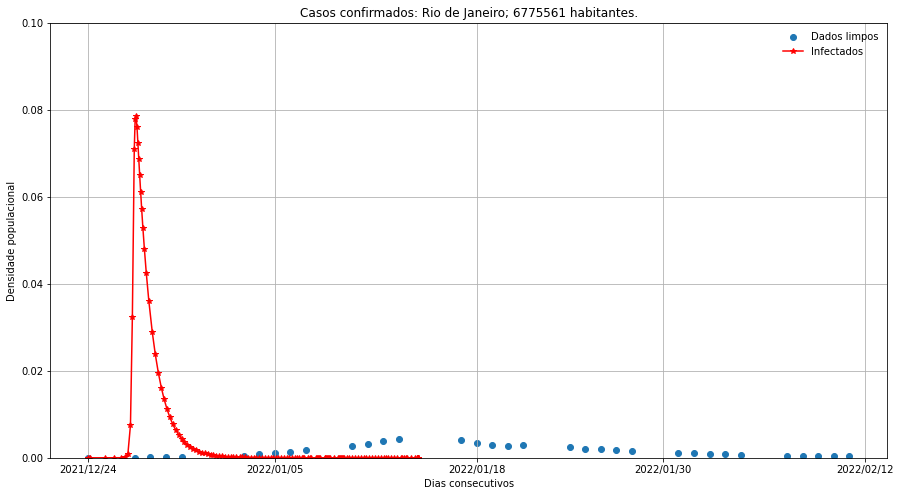

In [63]:
##############################
# Entrada

dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')

população = 6775561
# Fonte: <https://www.ibge.gov.br/cidades-e-estados/rj/rio-de-janeiro.html> 06/05/2022

nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 680
leste = 730

##############################

# Modelo.

# SEIR.

# sub de subida.
# des de descida.
# Gamma = 1

def sir(t, y):
    s, i, r = y
    R0 = np.exp((t-oeste))
    dsdt = - R0 * s * i
    didt = R0 * s * i - i
    drdt = i
    return dsdt, didt, drdt


t0, t =  oeste, leste
i0 = 1e-6
r0 = 0
s0 = 1 - i0 - r0

res = solve_ivp(sir, (t0, t), y0=[s0, i0, r0])

##############################

meio = int((oeste+leste)/2)
um_quarto = int((oeste+meio)/2)
tres_quartos = int((meio+leste)/2)

dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
dados0_x_rio = dados0.index[oeste:leste].to_numpy()


inf = res.y[1]/10
##############################
# Plot.

fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_rio, dados0_y_rio, alpha=1, label='Dados limpos')

ax.plot(res.t, inf, '*-r', label='Infectados')

#ax.plot(res.t, res.y[0], 'o-y',lw=3, label='Suscetível')
#ax.plot(res.t, res.y[1], '*-r', label='Infectados')
#ax.plot(res.t, res.y[2], '-b', label='Recuperados')

ax.grid(True)
ax.set_ylabel('Densidade populacional')
ax.set_xlabel('Dias consecutivos')
ax.legend(frameon=False)
label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
          dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)
plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')

ax.set_ylim([0,1e-1])